In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\Navin\Downloads\Startups Success Rate Prediction\startup data.csv")

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.shape

(923, 49)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 6', 'id', 'zip_code', 'object_id', 'state_code.1', 'status', 'name',  'city', 'latitude',
         'longitude', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
         'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
         'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'], axis = 1, inplace = True)  

In [7]:
df.shape

(923, 19)

In [8]:
df.isna().sum()

state_code                    0
labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
dtype: int64

In [9]:
# Remove rows with missing values in the specified columns
df.dropna(subset=['age_first_milestone_year', 'age_last_milestone_year'], inplace=True)

In [10]:
df.isna().sum().sum()

0

In [11]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500


In [12]:
df.describe()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.712987,2.018248,3.818604,3.055706,4.755399,8.540260,2.372727,2.647875e+07,2.205195,0.314286,0.276623,0.542857,0.410390,0.228571,0.102597,2.849587,0.828571
std,0.452662,2.297679,2.880418,2.978976,3.214081,7.402355,1.383550,2.072467e+08,1.137823,0.464533,0.447619,0.498484,0.492224,0.420185,0.303630,1.896506,0.377128
min,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.496575,1.639725,1.000000,2.397300,4.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,1.000000,1.309600,3.320550,2.519150,4.482200,6.000000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,1.000000,3.016425,5.363700,4.688350,6.753400,11.000000,3.000000,2.450000e+07,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000
max,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,8.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


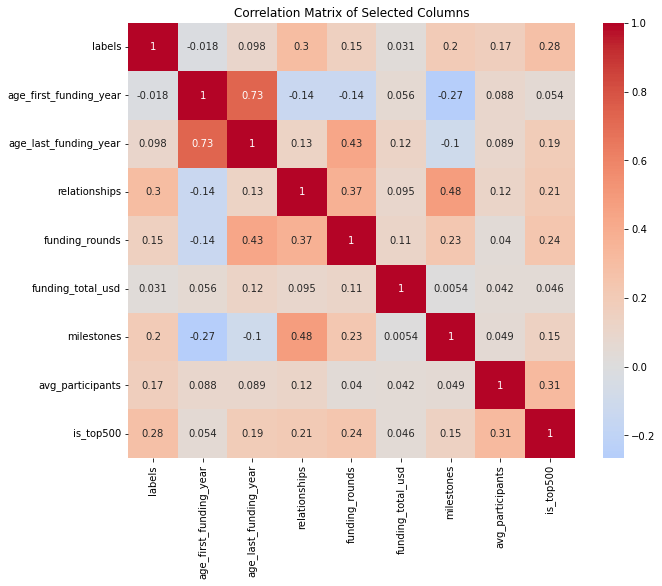

In [13]:
columns = [
    'labels', 'age_first_funding_year', 'age_last_funding_year', 
    'relationships', 'funding_rounds', 'funding_total_usd', 
    'milestones', 'avg_participants', 'is_top500'
]

# Create a subset DataFrame with the selected columns
subset_df = df[columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Selected Columns')
plt.show()

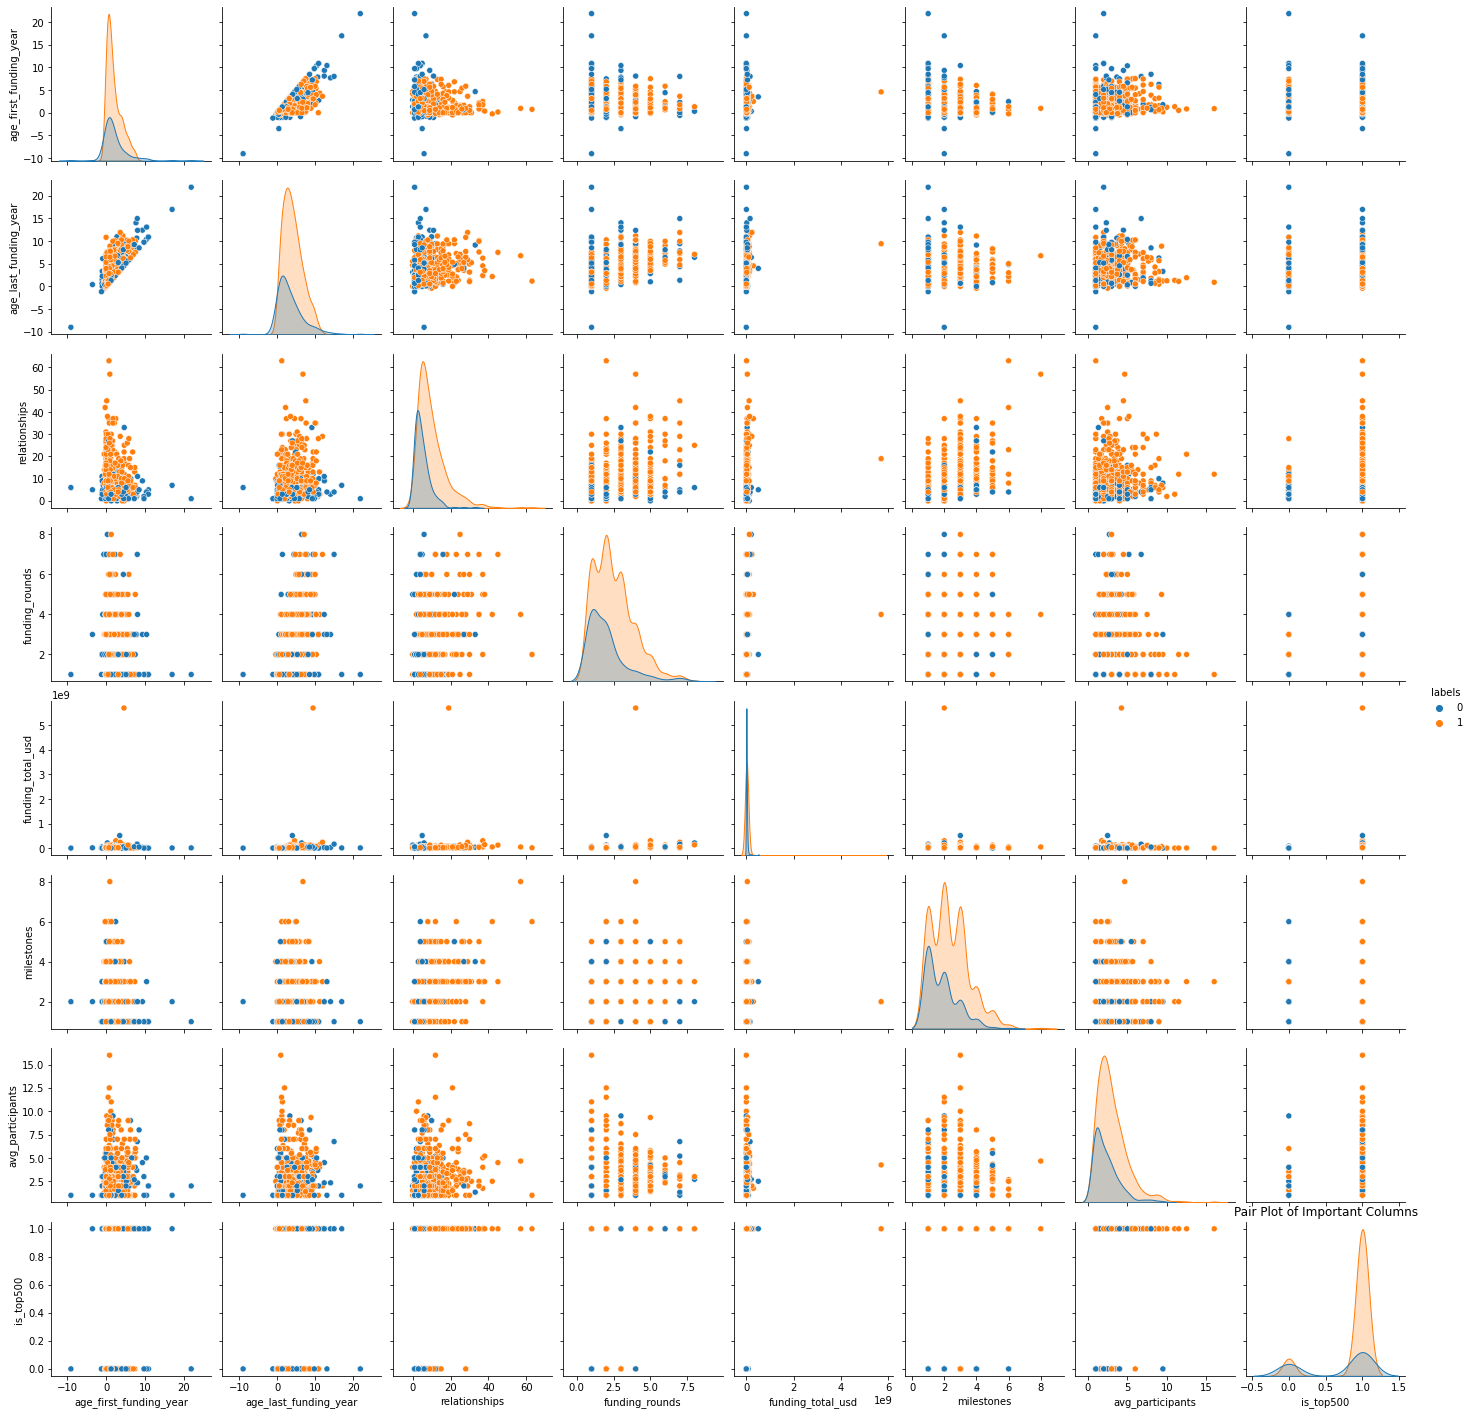

In [14]:
# Select the columns
imp_columns = [
    'labels', 'age_first_funding_year', 'age_last_funding_year',
    'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'avg_participants', 'is_top500'
]

subset_df = df[imp_columns]

# Pair Plot
sns.pairplot(subset_df, hue='labels', diag_kind='kde')
plt.title('Pair Plot of Important Columns')
plt.show()

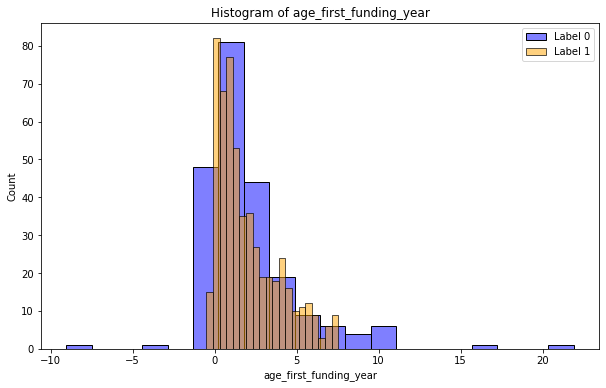

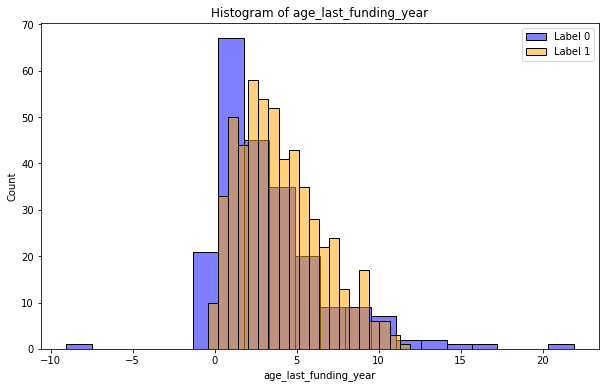

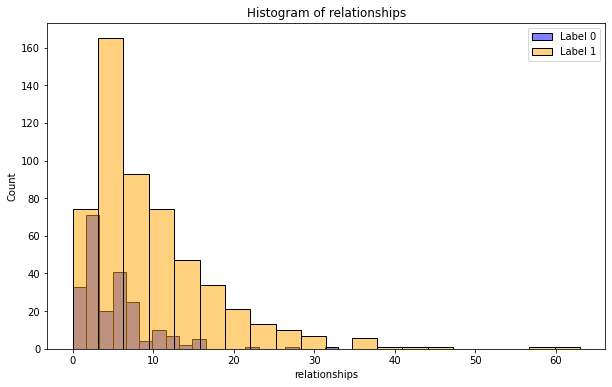

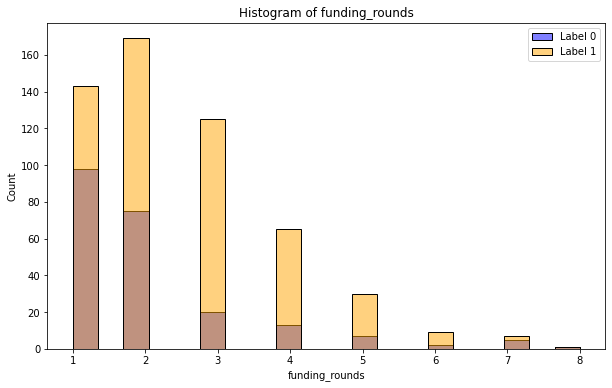

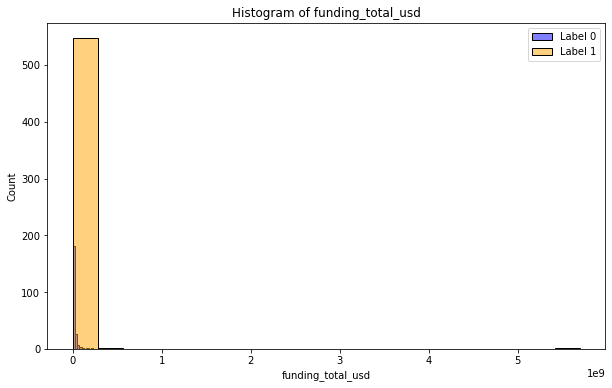

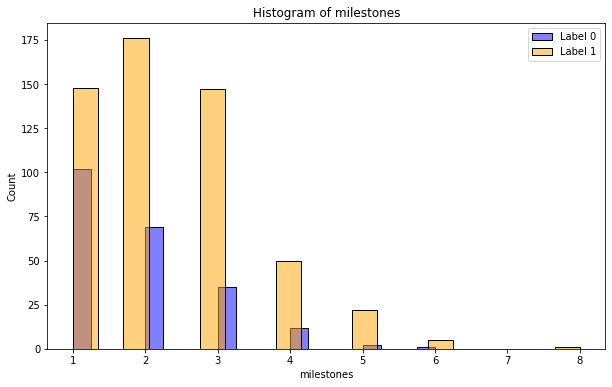

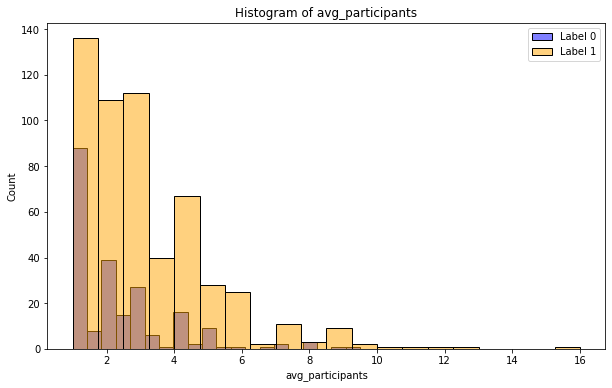

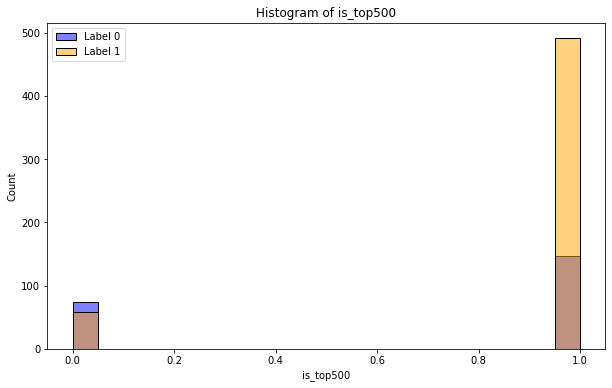

In [15]:
# Select the important columns
imp_cols = [
    'labels', 'age_first_funding_year', 'age_last_funding_year',
    'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'avg_participants', 'is_top500'
]

# Create a subset of the data with the important columns
subset_df = df[imp_cols]

# Separate the data by labels
label_0_data = subset_df[subset_df['labels'] == 0]
label_1_data = subset_df[subset_df['labels'] == 1]

# Histogram Plots for Label 0
for column in imp_cols[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=label_0_data, x=column, bins=20, color='blue', alpha=0.5, label='Label 0')
    sns.histplot(data=label_1_data, x=column, bins=20, color='orange', alpha=0.5, label='Label 1')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

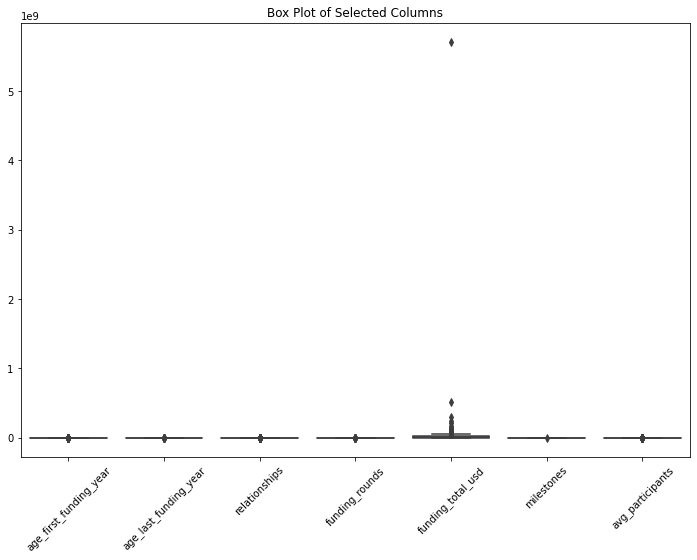

In [16]:
# Selecting the columns for which want to create box plots
columns_of_interest = [
    'age_first_funding_year', 'age_last_funding_year',
    'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'avg_participants'
]

# Create a subset of the data with the selected columns
subset_df = df[columns_of_interest]

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset_df)
plt.title('Box Plot of Selected Columns')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Select columns by data type
categorical_columns = ['state_code', 'category_code']
numerical_columns = [
    'age_first_funding_year', 'age_last_funding_year',
    'age_first_milestone_year', 'age_last_milestone_year',
    'relationships', 'funding_rounds', 'funding_total_usd',
    'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
    'has_roundC', 'has_roundD', 'avg_participants', 'is_top500'
]

# Create transformers
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scaler, numerical_columns + categorical_columns)  # Include both numerical and categorical columns
    ]
)

# Apply preprocessing
X_scaled = preprocessor.fit_transform(df)

# Get the column names for the preprocessed DataFrame
encoded_scaled_column_names = numerical_columns + categorical_columns

# Create a DataFrame from the preprocessed data
encoded_scaled_df = pd.DataFrame(X_scaled, columns=encoded_scaled_column_names)

# Display the preprocessed DataFrame
encoded_scaled_df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,state_code,category_code
0,0.100624,-0.283443,0.541744,0.606695,-0.748932,0.453674,-0.126037,0.698985,-0.677003,1.617103,-1.089725,-0.834287,-0.544331,-0.338123,-0.975894,-2.198484,-0.774222,-0.077312
1,1.353441,2.146463,1.326752,0.700531,0.062148,1.176922,0.065768,-1.059900,1.477098,-0.618390,-1.089725,1.198628,1.837117,2.957505,1.002711,0.454859,-0.774222,-0.969816
2,-0.429124,-0.967747,-0.536844,-0.793868,-0.478572,-0.992823,-0.115294,-0.180457,-0.677003,-0.618390,0.917663,-0.834287,-0.544331,-0.338123,0.606990,0.454859,-0.774222,1.261444
3,0.484827,0.519879,0.989907,0.388326,-0.478572,0.453674,0.065285,-1.059900,-0.677003,-0.618390,-1.089725,1.198628,1.837117,2.957505,0.255221,0.454859,-0.774222,0.904443
4,-0.878956,-0.746941,-1.013525,-1.468558,-0.884112,-0.269574,-0.121571,-1.059900,1.477098,1.617103,-1.089725,-0.834287,-0.544331,-0.338123,-0.975894,0.454859,-0.774222,-0.702065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.653452,-1.146691,-0.831331,-0.071419,0.062148,-0.992823,-0.122536,-0.180457,-0.677003,-0.618390,0.917663,-0.834287,-0.544331,-0.338123,1.662246,0.454859,-0.774222,-1.683819
766,2.279368,1.879002,0.989907,0.388326,-1.019292,0.453674,0.123224,-1.059900,1.477098,-0.618390,-1.089725,1.198628,-0.544331,-0.338123,-0.096496,0.454859,0.207096,0.636692
767,2.821048,1.624881,1.998560,1.323198,-0.478572,-0.992823,0.084598,-1.059900,-0.677003,-0.618390,-1.089725,-0.834287,-0.544331,2.957505,2.717503,0.454859,-0.774222,-1.416068
768,-0.548452,-0.342431,-0.771506,-0.286364,0.467687,-0.269574,-0.053009,-0.180457,-0.677003,-0.618390,0.917663,1.198628,-0.544331,-0.338123,-0.975894,0.454859,-0.774222,0.904443


In [18]:
# Select features and target
X = encoded_scaled_df  # Features
y = df['labels']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8117
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.45      0.58        44
           1       0.81      0.95      0.88       110

    accuracy                           0.81       154
   macro avg       0.81      0.70      0.73       154
weighted avg       0.81      0.81      0.79       154



In [20]:
# Select features and target
X = encoded_scaled_df  # Features
y = df['labels']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision Classifier
dec_classifier = DecisionTreeClassifier(random_state=42)
dec_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dec_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7013
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        44
           1       0.80      0.78      0.79       110

    accuracy                           0.70       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.71      0.70      0.70       154



In [21]:
#feature scaling using the standardscalar 
from sklearn.preprocessing import StandardScaler
#scaling the data 
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

model_uno = LogisticRegression()

In [28]:
model_uno.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Select features and target
X = encoded_scaled_df  # Features
y = df['labels']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linearregression Classifier
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7922
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.43      0.54        44
           1       0.80      0.94      0.87       110

    accuracy                           0.79       154
   macro avg       0.77      0.68      0.70       154
weighted avg       0.78      0.79      0.77       154



# CONCLUSION